Zadania optymalizacyjne z elektrotechniki


#**PROBLEM 1 Mostek rezystorowy**

Na podstawie informacji zawartych w tabeli oraz na podstawie schematu należało określić rezystancję oporników tak aby wartości prądów znjdowały się w określonym zakresie a napięcie było zgodne z podanym, a moc rozpraszana na wyjściu była jak najmniejsza.

W tym celu zainstalowano potrzebne bibloteki i przystąpiłem do tworzenia zadania optymalizacyjnego z wykorzystaniem Pulp.

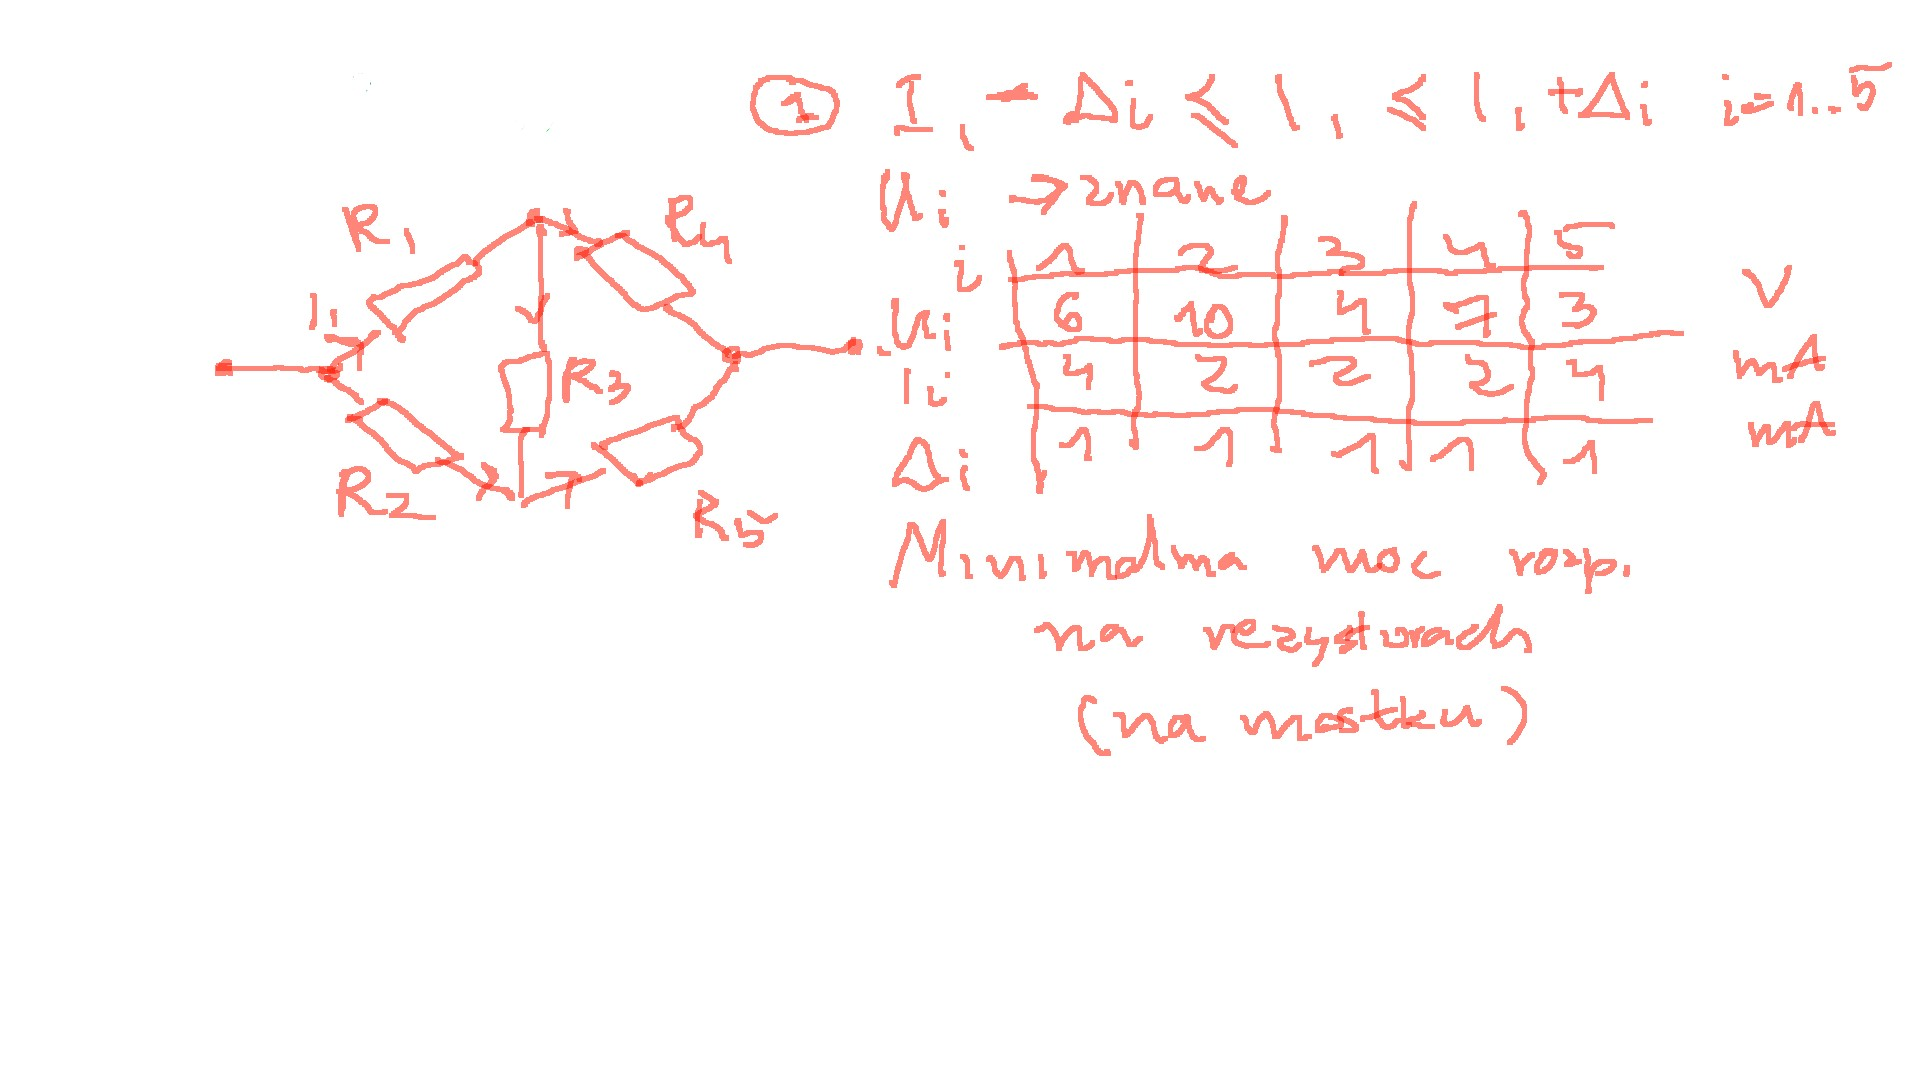

In [1]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

     |████████████████████████████████| 40.6MB 99kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 15 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 h

In [2]:
# Import PuLP modeler functions
from pulp import *
import pandas as pd
prob = LpProblem("Mostek",LpMinimize)

I1 = LpVariable("Prąd1",0)
I2 = LpVariable("Prąd2",0)
I3 = LpVariable("Prąd3",0)
I4 = LpVariable("Prąd4",0)
I5 = LpVariable("Prąd5",0)


prob += 6*I1 + 10*I2 + 4*I3 + 7*I4 + 3*I5, "Moc"
prob += 3 <= I1, "Prąd1 min"
prob += I1 <= 5, "Prąd1 max"
prob += 1 <= I2, "Prąd2 min"
prob += I2 <= 3, "Prąd2 max"
prob += 1 <= I3, "Prąd3 min"
prob += I3 <= 3, "Prąd3 max"
prob += 1 <= I4, "Prąd4 min"
prob += I4 <= 3, "Prąd4 max"
prob += 3 <= I5, "Prąd5 min"
prob += I5 <= 5, "Prąd5 max"

prob.writeLP("MostekModel.lp")
prob.solve()

print ("Status:", LpStatus[prob.status])

for v in prob.variables():
    print (v.name, "=", v.varValue,"A,")

print("R1 =", 6/I1.varValue,"k,")
print("R2 =", 10/I2.varValue,"k,")
print("R3 =", 4/I3.varValue,"k,")
print("R4 =", 7/I4.varValue,"k,")
print("R5 =", 3/I5.varValue,"k")

Status: Optimal
Prąd1 = 3.0 A,
Prąd2 = 1.0 A,
Prąd3 = 1.0 A,
Prąd4 = 1.0 A,
Prąd5 = 3.0 A,
R1 = 2.0 k,
R2 = 10.0 k,
R3 = 4.0 k,
R4 = 7.0 k,
R5 = 1.0 k


# **PROBLEM 2 Układ rezystorów**
-Wyzmaczenie maksymalnego prądu w układzie.

Na podstawie schematu i danych należało wyznaczyć maksymalny prąd, który może popłynąć przez gałąź. Określone mieliśmy rezystancje kolejnych rezystorów oraz ich maksymalne prądy.

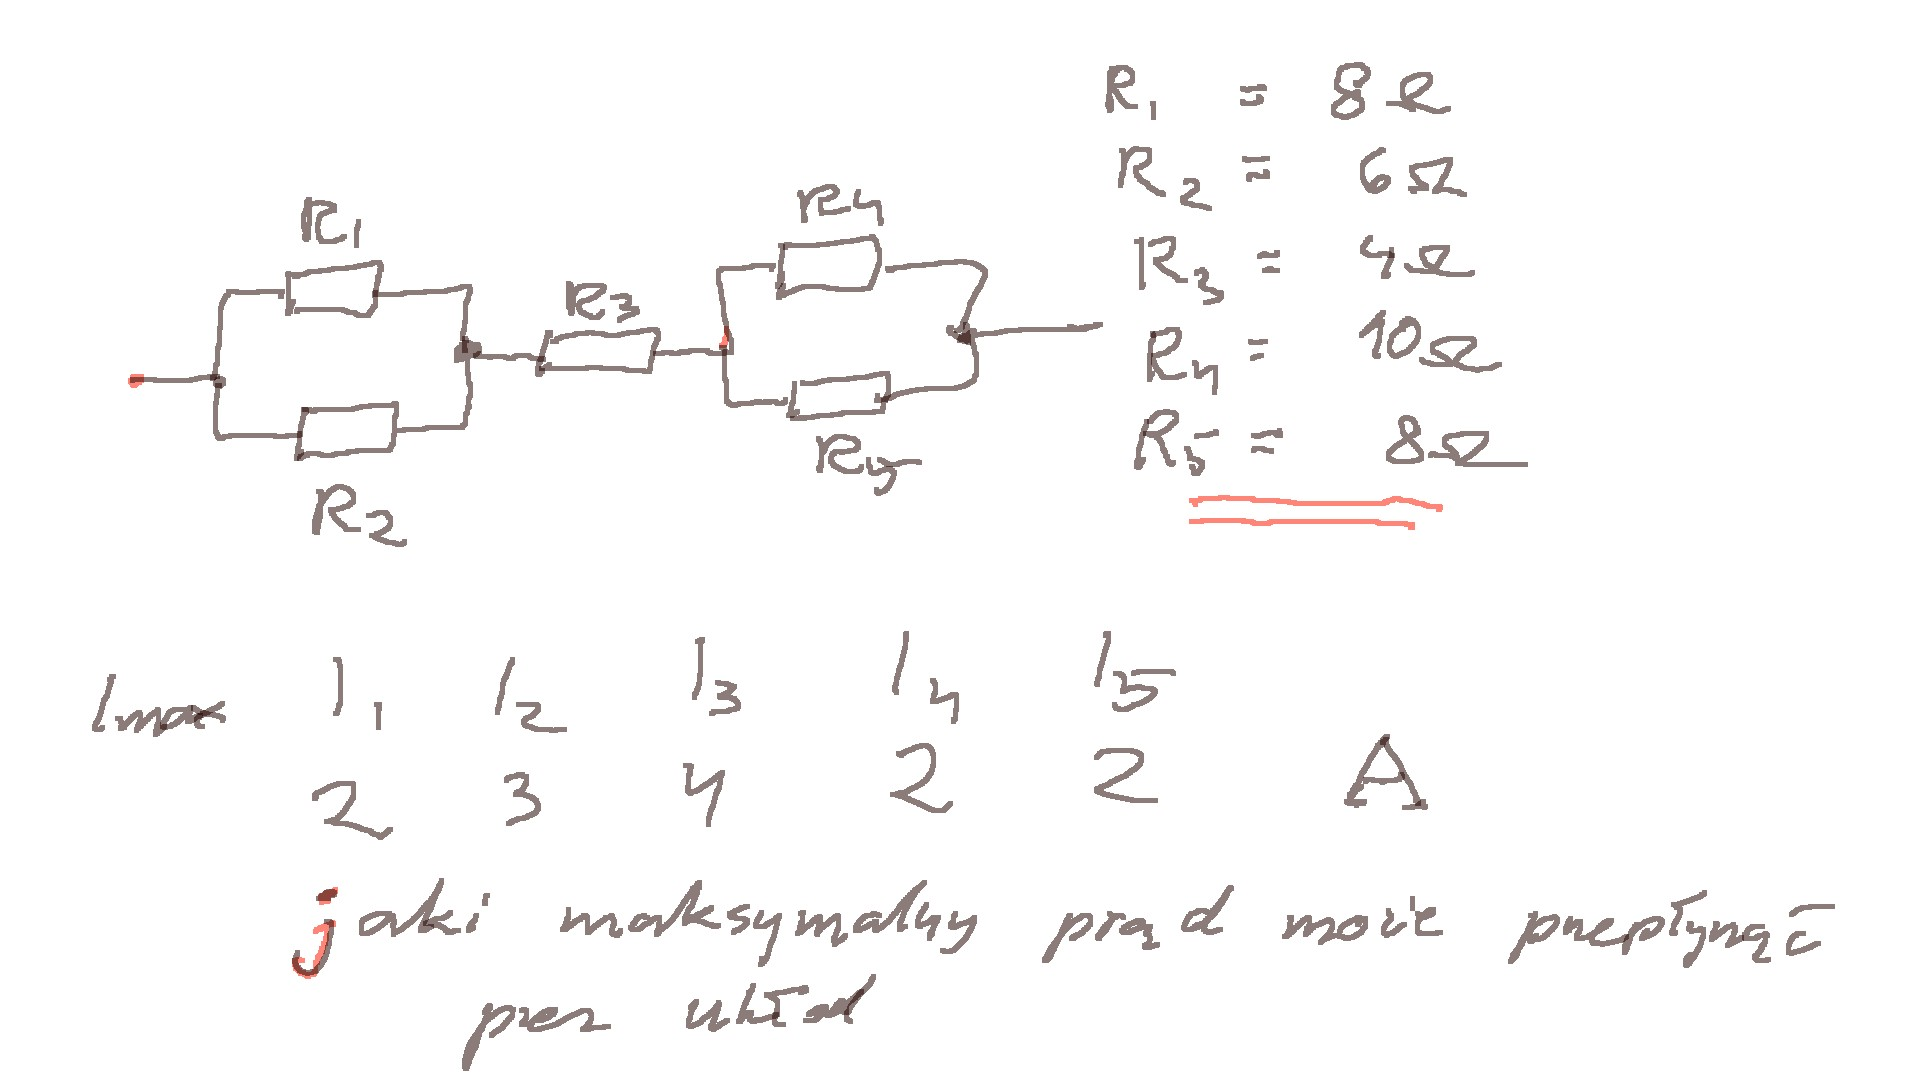

In [3]:
from pulp import *


prob = LpProblem("Maksymalizacja_pradu_w_ukladzie",LpMaximize)

i1=LpVariable("i1",0,None,LpContinuous)
i2=LpVariable("i2",0,None,LpContinuous)
i3=LpVariable("i3",0,None,LpContinuous)
i4=LpVariable("i4",0,None,LpContinuous)
i5=LpVariable("i5",0,None,LpContinuous)

R = [8,6,4,10,8]

i = i3 #prad w ukladzie

prob += i

prob += i1 + i2 == i3 #kirchhoff
prob += i4 + i5 == i3 #kirchhoff

#ograniczenia pradow
prob += i1 <= 2
prob += i2 <= 3
prob += i3 <= 4
prob += i4 <= 2
prob += i5 <= 2

prob.writeLP("rezo.lp")
prob.solve()

varsdict = {}

j = 0
for v in prob.variables():
    varsdict[v.name,"u"+str(j+1)] = str(v.varValue), v.varValue*R[j]
    j += 1

#!cat "rezo.lp"

print("Status:", LpStatus[prob.status])
print("Max prąd {}A, prądy [A] i napięcia [V]: {}".format(value(prob.objective),varsdict))

Status: Optimal
Max prąd 4.0A, prądy [A] i napięcia [V]: {('i1', 'u1'): ('1.0', 8.0), ('i2', 'u2'): ('3.0', 18.0), ('i3', 'u3'): ('4.0', 16.0), ('i4', 'u4'): ('2.0', 20.0), ('i5', 'u5'): ('2.0', 16.0)}
